In [ ]:
import json
import statistics
import numpy as np

In [2]:
bcmap = {}
with open('./business.json','r') as bf:
    for line in bf:
        newline = json.loads(line)
        key = newline['business_id']
        value = newline['categories']
        bcmap[key] = value


In [3]:
category = {}
for i in bcmap:
    if 'Restaurants' in bcmap[i]:
        for j in bcmap[i]:
            if j not in category:
                category[j] = 1
            else:
                category[j] += 1

In [4]:
top_cate = sorted(category.items(), key=lambda x:(-x[1]))[1:21]

In [5]:
tc = []
for i in top_cate:
    tc.append(i[0])

In [9]:
tc

['Food',
 'Nightlife',
 'Bars',
 'Sandwiches',
 'Fast Food',
 'American (Traditional)',
 'Pizza',
 'Italian',
 'Burgers',
 'Breakfast & Brunch',
 'Mexican',
 'American (New)',
 'Chinese',
 'Cafes',
 'Coffee & Tea',
 'Japanese',
 'Chicken Wings',
 'Seafood',
 'Event Planning & Services',
 'Salad']

In [22]:
ucrmap = {}
with open('./review.json', 'r') as rv:
    for line in rv:
        n1 = json.loads(line)
        okey = n1['user_id']
        ikeys = bcmap[n1['business_id']]
        value = n1['stars']
        if n1['user_id'] not in ucrmap:
            ucrmap[okey] = {}
        for ikey in ikeys:
            if ikey in tc:
                ucrmap[okey].setdefault(ikey, []).append(value)

In [24]:
for user in ucrmap:
    for cate, value in ucrmap[user].items():
        ucrmap[user][cate] = statistics.mean(value)

In [25]:
for user in ucrmap:
    for i in tc:
        if i not in ucrmap[user]:
            ucrmap[user][i] = 0

In [26]:
nucrmap = {}
for k, v in ucrmap.items():
    nucrmap[k] = []
    for i, j in v.items():
        nucrmap[k].append(j)

In [29]:
n = 0
for k, v in nucrmap.items():
    nucrmap[k] = np.array(v)
for k, v in nucrmap.items():
    if n < 10:
        n += 1
        print(k, '         ', v)

AP95DaCKAzmQwRpj1B1X-Q           [0 3 0 0 0 0 0 0 1 3 0 0 3 1 0 1 0 0 0 0]
gPc8sWIh9unW0CcnrXS6hg           [ 0.   2.   0.   5.   0.   4.   0.   0.   0.   0.   2.   0.   2.   4.   0.
  2.5  0.   0.   0.   0. ]
AgTQ5MJqrmqD3cgYz1XmGA           [0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
v9Ak8reRBQ_IpJUy9PS6sg           [0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
ULgXqB_bArS3uN4Qo_KvZQ           [ 3.46666667  3.625       3.5         3.5         4.5         3.83333333
  4.          5.          3.5         3.625       0.          0.          4.
  3.78571429  0.          4.5         5.          3.6         0.          3.6       ]
PQJOS_KMqvHem64kV3iocw           [0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
cYV3RfM7mzKul76U48H0uQ           [0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0]
r-wCbRWALOOxUnjvS_00GQ           [0 5 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 5 0 0]
CsqwvRdN6kT4Wffoo52KvA           [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
5TGvxJv6jVmKLarAHuIjAQ           [ 3.   1.   0.   0.   0.   0.   0.   1

In [30]:
for v in nucrmap.values():
    dist = np.linalg.norm(v[0] - v[1])
dist

5.0

In [31]:
from scipy.spatial import distance

In [32]:
a = (1,2,3)
b = (4,5,6)
dst = distance.euclidean(a,b)

In [33]:
dst

5.196152422706632

In [95]:
listV = list(nucrmap.values())
listK = list(nucrmap.keys())
pm = []

for i in range(10):
    pm.append([])
    for j in range(0,10):
        if i == j:
            pm[i].append(0)
        else:
            v1 = listV[i]
            v2 = listV[j]
            dst1 = distance.euclidean(v1, v2)
            pm[i].append(dst1)

In [96]:
import scipy


Z = scipy.cluster.hierarchy.linkage(pm, method='average')
#     R = scipy.cluster.hierarchy.inconsistent(Z, d=2)
plt.clf()
fig = plt.figure()
dd = scipy.cluster.hierarchy.dendrogram(Z)
plt.savefig('{}.pdf'.format(method))

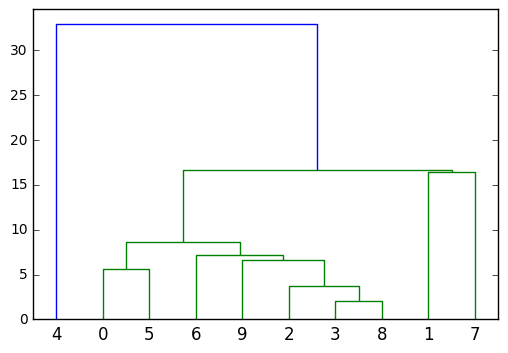

In [97]:
plt.show()

In [72]:
plt.show()

In [105]:
Z

array([[  3.        ,   8.        ,   2.00026103,   2.        ],
       [  2.        ,  10.        ,   3.75536032,   3.        ],
       [  0.        ,   5.        ,   5.67509385,   2.        ],
       [  9.        ,  11.        ,   6.59469791,   4.        ],
       [  6.        ,  13.        ,   7.14090804,   5.        ],
       [ 12.        ,  14.        ,   8.64240296,   7.        ],
       [  1.        ,   7.        ,  16.40008504,   2.        ],
       [ 15.        ,  16.        ,  16.65907229,   9.        ],
       [  4.        ,  17.        ,  32.8963237 ,  10.        ]])

In [124]:
u_id = 'AgTQ5MJqrmqD3cgYz1XmGA'
listK = list(nucrmap.keys())


In [125]:
listK.index(u_id)

2

In [121]:
for i in range(len(Z)):
    if Z[i][2] > 15:
        Y = np.delete(Z, i, 0)
Y

array([[  3.        ,   8.        ,   2.00026103,   2.        ],
       [  2.        ,  10.        ,   3.75536032,   3.        ],
       [  0.        ,   5.        ,   5.67509385,   2.        ],
       [  9.        ,  11.        ,   6.59469791,   4.        ],
       [  6.        ,  13.        ,   7.14090804,   5.        ],
       [ 12.        ,  14.        ,   8.64240296,   7.        ]])

In [126]:
type(Y)

numpy.ndarray

------
What to do next
==================
Write a function to get the cluster out from the above output(dendrogram or np array)
and then find out all the users in each cluster to calculate the average feature vectors.
Do the same thing for business_id one.
for whichever business_id we recommend the one mathes with average feature vector by doing inner product of two vector.
And then change some of the parameters like numbers of top categories to see what the result will be.
